In [1]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU,Dense, Dropout

In [2]:
key='b7229f382db696b1193092be9f3962e64bca5125'

In [3]:
df=pdr.get_data_tiingo('AAPL', api_key=key)

In [4]:
df.head()

close    high     low    open    volume  \
symbol date                                                                  
AAPL   2016-08-01 00:00:00+00:00  106.05  106.15  104.41  104.41  38167871   
       2016-08-02 00:00:00+00:00  104.48  106.07  104.00  106.05  33816556   
       2016-08-03 00:00:00+00:00  105.79  105.84  104.77  104.81  30202641   
       2016-08-04 00:00:00+00:00  105.87  106.00  105.28  105.58  27408650   
       2016-08-05 00:00:00+00:00  107.48  107.65  106.18  106.27  40553402   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2016-08-01 00:00:00+00:00  24.764101  24.787452  24.381139  24.381139   
       2016-08-02 00:00:00+00:00  24.397485  24.768771  24.285399  24.764101   
       2016-08-03 00:00:00+00:00  24.703388  24.715063  24.465204  24.474544   
       2016-08-04 00:00:00+00:00  24.855171  24.885692  24.716657  24.787088   
       2016-08-05 00:00:00+00:00  25.233152  25.273063  24.927950  24.949080   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2016-08-01 00:00:00+00:00  152671484     0.00          1.0  
       2016-08-02 00:00:00+00:00  135266224     0.00          1.0  
       2016-08-03 00:00:00+00:00  120810564     0.00          1.0  
       2016-08-04 00:00:00+00:00  109634600     0.57          1.0  
       2016-08-05 00:00:00+00:00  162213608     0.00          1.0

In [5]:
df1=df.reset_index()['close']

In [6]:
df1.shape

(1258,)

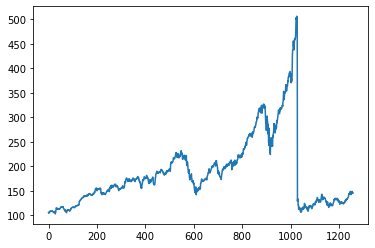

In [7]:
plt.plot(df1)

### Scale the data as LSTM is sensitive to Scale of data, so we r converting it to 0-1

In [8]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [9]:
df1.shape

(1258, 1)

In [10]:
#Spitting the dataset into train and test
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data, test_data=df1[0:training_size,:], df1[training_size:len(df1), :1]

In [11]:
training_size, test_size

(943, 315)

In [12]:
len(train_data), len(test_data)

(943, 315)

In [13]:
def create_dataset(dataset, time_step=1):
    datax,datay=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        datax.append(a)
        datay.append(dataset[i+time_step,0])
    return np.array(datax), np.array(datay)

In [14]:

time_step=100
x_train,y_train=create_dataset(train_data, time_step)
x_test, y_test=create_dataset(test_data,time_step)

In [15]:
print(x_test)

[[0.47317352 0.46143538 0.47158527 ... 0.01789259 0.00920687 0.01724737]
 [0.46143538 0.47158527 0.48250447 ... 0.00920687 0.01724737 0.0215406 ]
 [0.47158527 0.48250447 0.49012309 ... 0.01724737 0.0215406  0.00990173]
 ...
 [0.04697737 0.04218781 0.04538912 ... 0.10489875 0.10837304 0.11274072]
 [0.04218781 0.04538912 0.03283204 ... 0.10837304 0.11274072 0.11380782]
 [0.04538912 0.03283204 0.04455777 ... 0.11274072 0.11380782 0.10829859]]


In [16]:
print(y_test)

[0.0215406  0.00990173 0.01263153 0.02270697 0.02935775 0.02719873
 0.03146714 0.03389915 0.02454338 0.03317947 0.02489081 0.02965555
 0.02938257 0.03434584 0.0527844  0.044595   0.04481834 0.04362716
 0.03943319 0.03188902 0.03568592 0.03409768 0.03131824 0.02955628
 0.0295811  0.03342764 0.0200268  0.03025114 0.01421977 0.01399643
 0.01814076 0.02933294 0.03945801 0.03861425 0.03273278 0.0318642
 0.04059956 0.03990471 0.04002879 0.04260969 0.0403514  0.03697637
 0.03849017 0.03526405 0.02660314 0.0298789  0.0320131  0.03340282
 0.03950764 0.04861525 0.04950864 0.04916121 0.04744888 0.05117133
 0.05273476 0.04628251 0.0499057  0.04784594 0.04628251 0.06142049
 0.06124677 0.06345543 0.05838048 0.06228906 0.07134703 0.06906393
 0.07157038 0.0832837  0.07876712 0.07591324 0.07335716 0.06521739
 0.06918801 0.05824399 0.06896466 0.07176891 0.06415029 0.06370359
 0.06889021 0.06397657 0.05958408 0.06129641 0.07171928 0.0837304
 0.08918999 0.09874429 0.09933988 0.09661009 0.08427635 0.071545

In [17]:
print(x_train.shape), print(y_train.shape)

(842, 100)
(842,)


(None, None)

In [18]:
print(x_test.shape), print(y_test.shape)

(214, 100)
(214,)


(None, None)

In [19]:
#reshape the data to 3d(samples, time steps, features) which is needed for LSTM
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

# Creating Stacked GRU

In [20]:
model=Sequential()
model.add(GRU(50,return_sequences=True, input_shape=(100,1)))
model.add(Dropout(0.3))
model.add(GRU(50,return_sequences=True))
model.add(Dropout(0.3))
model.add(GRU(50))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 100, 50)           7950      
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
gru_1 (GRU)                  (None, 100, 50)           15300     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
gru_2 (GRU)                  (None, 50)                15300     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 5

In [22]:
model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
14/14 [==============================] - 3s 246ms/step - loss: 0.0132 - val_loss: 0.0016
Epoch 2/100
14/14 [==============================] - 2s 150ms/step - loss: 0.0037 - val_loss: 0.0019
Epoch 3/100
14/14 [==============================] - 2s 139ms/step - loss: 0.0019 - val_loss: 9.4048e-05
Epoch 4/100
14/14 [==============================] - 2s 138ms/step - loss: 0.0019 - val_loss: 1.0332e-04
Epoch 5/100
14/14 [==============================] - 2s 142ms/step - loss: 0.0015 - val_loss: 2.0691e-04
Epoch 6/100
14/14 [==============================] - 2s 137ms/step - loss: 0.0015 - val_loss: 8.6124e-05
Epoch 7/100
14/14 [==============================] - 2s 137ms/step - loss: 0.0013 - val_loss: 8.9603e-05
Epoch 8/100
14/14 [==============================] - 2s 136ms/step - loss: 0.0012 - val_loss: 1.7736e-04
Epoch 9/100
14/14 [==============================] - 2s 137ms/step - loss: 0.0013 - val_loss: 1.0582e-04
Epoch 10/100
14/14 [==============================] - 2s 137ms/

14/14 [==============================] - 2s 141ms/step - loss: 4.9930e-04 - val_loss: 8.3385e-05
Epoch 77/100
14/14 [==============================] - 2s 140ms/step - loss: 5.2448e-04 - val_loss: 6.2727e-05
Epoch 78/100
14/14 [==============================] - 2s 140ms/step - loss: 4.4990e-04 - val_loss: 6.6258e-05
Epoch 79/100
14/14 [==============================] - 2s 149ms/step - loss: 5.9572e-04 - val_loss: 8.5261e-05
Epoch 80/100
14/14 [==============================] - 2s 141ms/step - loss: 4.4951e-04 - val_loss: 7.2366e-05
Epoch 81/100
14/14 [==============================] - 2s 140ms/step - loss: 5.6036e-04 - val_loss: 5.3747e-05
Epoch 82/100
14/14 [==============================] - 2s 141ms/step - loss: 5.1190e-04 - val_loss: 1.3302e-04
Epoch 83/100
14/14 [==============================] - 2s 141ms/step - loss: 5.1357e-04 - val_loss: 6.7453e-05
Epoch 84/100
14/14 [==============================] - 2s 140ms/step - loss: 4.6819e-04 - val_loss: 9.3421e-05
Epoch 85/100
14/14 [===

## Check Prediction and performance

In [23]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [24]:
#Transforming back to the original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [25]:
#Calculation of RMSE
math.sqrt(mean_squared_error(y_train, train_predict))

194.6628556285275

In [26]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

133.2473782743951

## Plotting

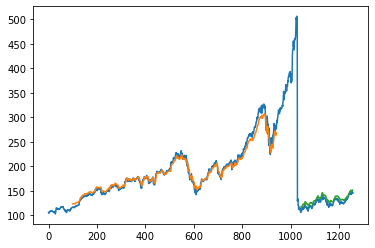

In [27]:
look_back=100
trainPredictPlot= np.empty_like(df1)
trainPredictPlot[:, :]= np.nan
trainPredictPlot[look_back:len(train_predict)+ look_back, :]= train_predict

testPredictPlot= np.empty_like(df1)
testPredictPlot[:, :]=np.nan
testPredictPlot[len(train_predict)+(look_back*2) + 1:len(df1) -1, :]=test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
                

## Forecasting

In [28]:
len(test_data)

315

In [29]:
x_input= test_data[215:].reshape(1,-1)
x_input.shape

(1, 100)

### Converting it to a list

In [30]:
temp_input= list(x_input)
temp_input= temp_input[0].tolist()

Prediction for next 30 days

In [31]:


lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.11686219]
101
1 day input [0.04181556 0.0467292  0.04442128 0.05176692 0.05568791 0.05367778
 0.04318046 0.04184038 0.05027794 0.04816855 0.04208854 0.04332936
 0.04486798 0.04531467 0.04161703 0.04720071 0.04931011 0.05650685
 0.05727616 0.06147012 0.06757495 0.07411406 0.06975878 0.0776752
 0.07171928 0.07784892 0.07700516 0.07869267 0.07439944 0.07536728
 0.07149593 0.07740222 0.07839488 0.07757594 0.07556581 0.07531765
 0.07030474 0.07298491 0.06134604 0.06196645 0.06603633 0.0672027
 0.0588644  0.05653167 0.04873933 0.05419893 0.06035338 0.05742505
 0.05390113 0.05350407 0.06000596 0.05534048 0.05948481 0.05898849
 0.0588644  0.05496824 0.05330554 0.0524866  0.05442228 0.05065019
 0.05648203 0.05650685 0.05859142 0.05955926 0.05702799 0.06010522
 0.06787274 0.06578817 0.0670538  0.07112368 0.06782311 0.07238932
 0.07655847 0.07586361 0.07514393 0.07439944 0.07854378 0.08239031
 0.08395374 0.08472305 0.09139865 0.09651082 0.10283899 0.09953842
 0.10417907 0.10266528 0.10549434 0

8 day output [[0.14213173]]
9 day input [0.05027794 0.04816855 0.04208854 0.04332936 0.04486798 0.04531467
 0.04161703 0.04720071 0.04931011 0.05650685 0.05727616 0.06147012
 0.06757495 0.07411406 0.06975878 0.0776752  0.07171928 0.07784892
 0.07700516 0.07869267 0.07439944 0.07536728 0.07149593 0.07740222
 0.07839488 0.07757594 0.07556581 0.07531765 0.07030474 0.07298491
 0.06134604 0.06196645 0.06603633 0.0672027  0.0588644  0.05653167
 0.04873933 0.05419893 0.06035338 0.05742505 0.05390113 0.05350407
 0.06000596 0.05534048 0.05948481 0.05898849 0.0588644  0.05496824
 0.05330554 0.0524866  0.05442228 0.05065019 0.05648203 0.05650685
 0.05859142 0.05955926 0.05702799 0.06010522 0.06787274 0.06578817
 0.0670538  0.07112368 0.06782311 0.07238932 0.07655847 0.07586361
 0.07514393 0.07439944 0.07854378 0.08239031 0.08395374 0.08472305
 0.09139865 0.09651082 0.10283899 0.09953842 0.10417907 0.10266528
 0.10549434 0.11420488 0.11254219 0.10735557 0.09757792 0.10675998
 0.10489875 0.10837304

16 day output [[0.16039805]]
17 day input [0.04931011 0.05650685 0.05727616 0.06147012 0.06757495 0.07411406
 0.06975878 0.0776752  0.07171928 0.07784892 0.07700516 0.07869267
 0.07439944 0.07536728 0.07149593 0.07740222 0.07839488 0.07757594
 0.07556581 0.07531765 0.07030474 0.07298491 0.06134604 0.06196645
 0.06603633 0.0672027  0.0588644  0.05653167 0.04873933 0.05419893
 0.06035338 0.05742505 0.05390113 0.05350407 0.06000596 0.05534048
 0.05948481 0.05898849 0.0588644  0.05496824 0.05330554 0.0524866
 0.05442228 0.05065019 0.05648203 0.05650685 0.05859142 0.05955926
 0.05702799 0.06010522 0.06787274 0.06578817 0.0670538  0.07112368
 0.06782311 0.07238932 0.07655847 0.07586361 0.07514393 0.07439944
 0.07854378 0.08239031 0.08395374 0.08472305 0.09139865 0.09651082
 0.10283899 0.09953842 0.10417907 0.10266528 0.10549434 0.11420488
 0.11254219 0.10735557 0.09757792 0.10675998 0.10489875 0.10837304
 0.11274072 0.11380782 0.10829859 0.10385646 0.10549434 0.11686219
 0.11901782 0.1225363

24 day output [[0.17228976]]
25 day input [0.07171928 0.07784892 0.07700516 0.07869267 0.07439944 0.07536728
 0.07149593 0.07740222 0.07839488 0.07757594 0.07556581 0.07531765
 0.07030474 0.07298491 0.06134604 0.06196645 0.06603633 0.0672027
 0.0588644  0.05653167 0.04873933 0.05419893 0.06035338 0.05742505
 0.05390113 0.05350407 0.06000596 0.05534048 0.05948481 0.05898849
 0.0588644  0.05496824 0.05330554 0.0524866  0.05442228 0.05065019
 0.05648203 0.05650685 0.05859142 0.05955926 0.05702799 0.06010522
 0.06787274 0.06578817 0.0670538  0.07112368 0.06782311 0.07238932
 0.07655847 0.07586361 0.07514393 0.07439944 0.07854378 0.08239031
 0.08395374 0.08472305 0.09139865 0.09651082 0.10283899 0.09953842
 0.10417907 0.10266528 0.10549434 0.11420488 0.11254219 0.10735557
 0.09757792 0.10675998 0.10489875 0.10837304 0.11274072 0.11380782
 0.10829859 0.10385646 0.10549434 0.11686219 0.11901782 0.12253635
 0.12619883 0.12971206 0.13305254 0.13623179 0.13925676 0.14213173
 0.14486137 0.1474512

## Plotting of forecasted value

In [32]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [33]:
len(df1)

1258

In [34]:
df3=df1.tolist()
df3.extend(lst_output)

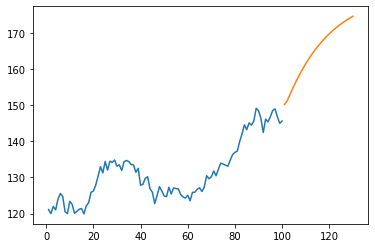

In [36]:
plt.plot(day_new, scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))